## 1. Word Cloud

1. Generate a word cloud based on the raw corpus -- I recommend you to use the Python word_cloud library. With the help of nltk (already available in your Anaconda environment), implement a standard text pre-processing pipeline (e.g., tokenization, stopword removal, stemming, etc.) and generate a new word cloud. Discuss briefly the pros and cons (if any) of the two word clouds you generated.

In [1]:
import pandas as pd
import nltk
from nltk.book import FreqDist
from nltk.corpus import stopwords
import os
from os import path
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from helpers import *
%matplotlib inline

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


## Creating the Text File

Taking only Hillary's email body text

In [2]:
emails = pd.read_csv('hillary-clinton-emails/Emails.csv')
emails = emails.ExtractedBodyText.dropna()
emails.to_csv('emails.txt')

## Loading the Text File

In [4]:
d = os.getcwd()
emails = open(path.join(d, 'emails.txt')).read()

## Word Clouds

### Tokenizing and Getting Word-Freq Pair

In [5]:
emails_tokenized = nltk.tokenize.word_tokenize(emails) # tokenizing
fdist = FreqDist(emails_tokenized) # word-freq tuples

### Word Cloud 1: Raw
We just get the wordcloud from the frequency of words in the raw text.

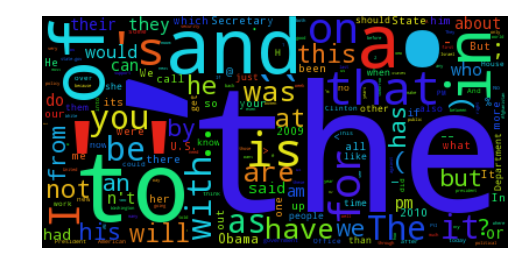

In [6]:
# Read the whole text.
wordcloud = WordCloud(max_words=200,stopwords=None).fit_words(fdist.items())

# Open a plot of the generated image.
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

We can see that this wordcloud does not seem to have any useful keywords. It just seems to be a collection of common keywords used in the english language.

### Word Cloud 2
The second wordcloud is printed after running the complete preprocessing pipeline on the input, to hopefully get more meaningful results in the wordcloud.
- Stopwords Removed
- Stemmed
- Common Words Removed
- Action Words Removed

In [54]:
# We simply run the pre-processing pipeline on the email dataset
stemmed = preprocess_pipeline(emails)

In [57]:
# We get the frequency of the words
fdist1 = FreqDist(stemmed)

In [61]:
# We look at the most common words to see if there are some common stopwords that were missed.
fdist1.most_common(50)

[('state', 3254),
 ('pm', 2137),
 ('call', 1608),
 ('would', 1537),
 ('secretari', 1409),
 ('time', 1378),
 ('1', 1341),
 ('work', 1294),
 ('offic', 1269),
 ('obama', 1262),
 ('u', 1259),
 ('said', 1241),
 ('presid', 1233),
 ('one', 1232),
 ('depart', 1225),
 ('new', 1106),
 ('meet', 1074),
 ('also', 1010),
 ('hous', 1009),
 ('like', 999),
 ('w', 967),
 ('get', 964),
 ('2010', 957),
 ('american', 954),
 ('us', 945),
 ('year', 943),
 ('10', 933),
 ('2', 930),
 ('govern', 915),
 ('30', 908),
 ('2009', 908),
 ('say', 896),
 ('want', 887),
 ('h', 869),
 ('see', 851),
 ('peopl', 831),
 ('fyi', 830),
 ('need', 820),
 ('nation', 817),
 ('go', 814),
 ('4', 812),
 ('gov', 793),
 ('know', 789),
 ('right', 774),
 ('8', 762),
 ('polit', 753),
 ('clinton', 751),
 ('make', 743),
 ('3', 731),
 ('support', 730)]

In [71]:
# We remove the common stopwords that might be specific to political conversations
hillary_stopwords = ['would','PM', 'pm', 'said','also','like','say', 'want', 'see', 'need', 'go']

filtered = stemmed[:] #make a copy of the word_list
for word in stemmed: # iterate over word_list
    if word in hillary_stopwords: 
        filtered.remove(word) # remove word from filtered_word_list if it is a stopword

In [72]:
# Getting a frequency after the removed common stopwords
fdist2 = FreqDist(filtered)
fdist2.most_common(50)

[('state', 3254),
 ('call', 1608),
 ('secretari', 1409),
 ('time', 1378),
 ('1', 1341),
 ('work', 1294),
 ('offic', 1269),
 ('obama', 1262),
 ('u', 1259),
 ('presid', 1233),
 ('one', 1232),
 ('depart', 1225),
 ('new', 1106),
 ('meet', 1074),
 ('hous', 1009),
 ('w', 967),
 ('get', 964),
 ('2010', 957),
 ('american', 954),
 ('us', 945),
 ('year', 943),
 ('10', 933),
 ('2', 930),
 ('govern', 915),
 ('30', 908),
 ('2009', 908),
 ('h', 869),
 ('peopl', 831),
 ('fyi', 830),
 ('nation', 817),
 ('4', 812),
 ('gov', 793),
 ('know', 789),
 ('right', 774),
 ('8', 762),
 ('polit', 753),
 ('clinton', 751),
 ('make', 743),
 ('3', 731),
 ('support', 730),
 ('think', 722),
 ('talk', 721),
 ('secur', 718),
 ('parti', 717),
 ('00', 677),
 ('first', 669),
 ('could', 667),
 ('issu', 660),
 ('today', 657),
 ('polici', 655)]

In [73]:
# here we remove stopwords particular to emails
email_stopwords = ['call','time','1','u', 'fw', 'meet','w','h','fyi','know', 'right', 'make','support','think','talk','could','well']
filtered2 = filtered[:] #make a copy of the word_list
for word in filtered: # iterate over word_list
    if word in email_stopwords: 
        filtered2.remove(word) # remove word from filtered_word_list if it is a stopword

In [74]:
fdist3 = FreqDist(filtered2) # After removing common speech words

In [75]:
len(filtered2)

348942

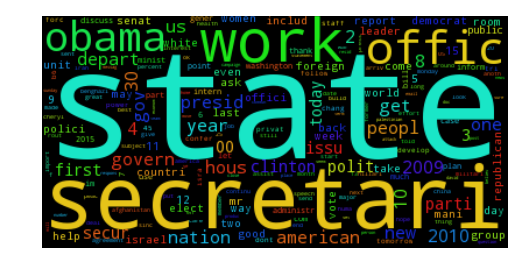

In [76]:
wordcloud = WordCloud(max_words=200).fit_words(fdist3.items())

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

As we can see, the final result is much better than the first, where we only had stopwords. The new wordcloud is much more meaninful, where we see that the words state and secretary are mentioned a lot, which is expected, with hillary being secretary of state. We also see the words clinton, obama, govern, policy and american which are all the kind of worlds we would expect in a politician's email database. We can conclude that preprocessing makes a huge difference in the wordcloud.

# Topic Modelling
We try to find the important topics in the email database using LDA.

In [80]:
from gensim import models, corpora
import pyLDAvis.gensim
%load_ext autoreload
%autoreload 2

/home/kirtan/anaconda3/lib/python3.5/site-packages/gensim/utils.py:1015: UserWarning: Pattern library is not installed, lemmatization won't be available.
  warnings.warn("Pattern library is not installed, lemmatization won't be available.")
/home/kirtan/anaconda3/lib/python3.5/site-packages/funcy/decorators.py:56: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  spec = inspect.getargspec(func)
/home/kirtan/anaconda3/lib/python3.5/site-packages/funcy/decorators.py:56: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  spec = inspect.getargspec(func)
/home/kirtan/anaconda3/lib/python3.5/site-packages/funcy/decorators.py:56: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  spec = inspect.getargspec(func)
/home/kirtan/anaconda3/lib/python3.5/site-packages/funcy/decorators.py:56: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  spe

We start by getting a list of the emails concatenated with the email subjects, because the subject might also potentially might have some useful keywords.

In [78]:
emails_df = pd.read_csv('hillary-clinton-emails/Emails.csv')
emails_df['email'] = emails_df['MetadataSubject'] + emails_df['ExtractedBodyText']

# list of emails with subjects
email_list = emails_df['email'].dropna().reset_index(drop=True)

We preprocess the text as we did in the first part so that we have a meaningful bag of words to work with, without the stopwords and other useless information. Also, we retrospectively remove the word 'state' as it seems to be coming up in every topic.

In [93]:
email_text = []
for text in email_list:
    text = preprocess_pipeline(text)
    for word in text: 
        if word in (hillary_stopwords + ['state']) or word in email_stopwords: 
            text.remove(word)
    email_text.append(text)

We make the dictionary and corpus in a format suitable to be used to run the LDA topic modelling using gensim.


In [94]:
dictionary = corpora.Dictionary(email_text)
corpus = [dictionary.doc2bow(text) for text in email_text]

We finally run the topic modelling for different number of topics and explore the results using pyLDAvis. We try to have a number in which the topic clusters are disjoint and meaningful and we also do not have too many topics, while covering as many of the words as possible. We start with just 2 topics and gradually go upto 30. We give a general analysis of how the trend is as we increase the number of topics.

In [102]:
topics = models.ldamodel.LdaModel(corpus, id2word=dictionary, num_topics = 7,  passes = 10)
email_data = pyLDAvis.gensim.prepare(topics, corpus, dictionary)
pyLDAvis.display(email_data)

When there are only 2 topics, they are well separated, but one of them is almost solely consisting of numbers and the other one has common political terms. The two topics seem to be 'relevant' and 'not relevant'.
When there are 3 topics, the topics are still well separated, but it seems difficult to assign a name to the topics. They are quite general. One of the clusters seems to consist of just irrelevant terms again.
The topics are slightly clearer when there are 4 topics. One of the topics seems to about the existing government with terms like 'obama', 'govern', 'american', 'president' and one about the elections, which has terms like 'democrat', 'republican', etc.
In 5 and 6 topics, there is one cluster completely inside the other therefore does not look like a good candidate. 
7 topics seems to hit the sweet spot, with each cluster looking meaningful and being almost disjoint. We conclude that the best number of topics seems to be 7. The topics are broadly 'secretary office', 'obama', 'israel/palestine', 'work', 'diplomacy'